In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [49]:
dd=pd.read_csv(r'F:\VIRU\New folder\Germany.csv')

In [50]:
dd.head()

,months,sales
0,2014-01,31
1,2014-02,66
2,2014-03,143
3,2014-04,49
4,2014-05,57


In [51]:
dd.tail()

,months,sales
79,2020-08,2845
80,2020-09,3065
81,2020-10,252
82,2020-11,1680
83,2020-12,3545


In [52]:
dd['months']=pd.to_datetime(dd['months'])

In [53]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

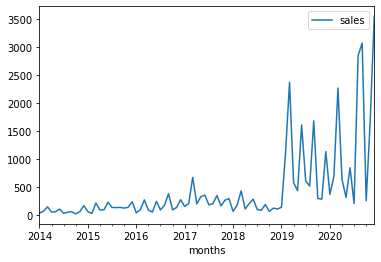

In [54]:
dd.plot()

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
dfuler = adfuller(dd['sales'])

In [57]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(1.550419533264796,
 0.9977009371824335,
 10,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1064.7326030539464)

In [58]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

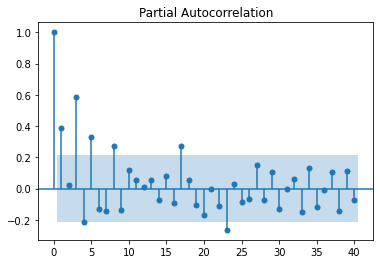

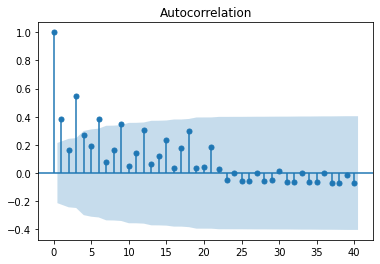

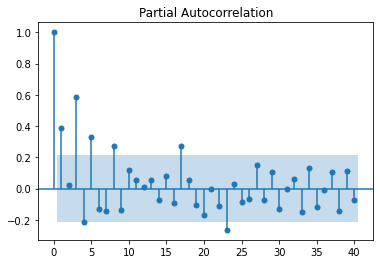

In [60]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

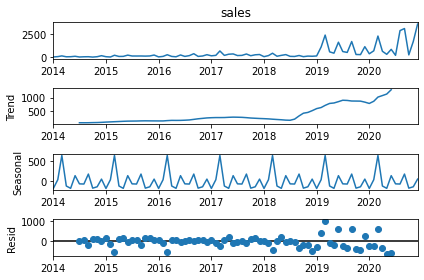

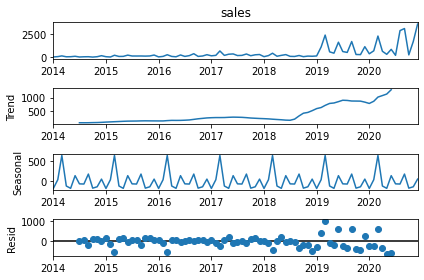

In [61]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [62]:
from pmdarima import auto_arima


In [17]:
auto=auto_arima(dd['sales'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1256.220, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1326.495, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1322.221, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1293.139, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1324.800, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1277.798, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1258.326, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1254.374, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1260.172, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1239.217, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1242.419, Time=0.31 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1239.233, Time=0.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1238.808, Time=0.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1237.279, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [63]:
import statsmodels.api as sm

In [96]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(8,0,0),seasonal_order=(2,0,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting paramete

In [97]:
dd['forecast']=results.predict(start=80,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

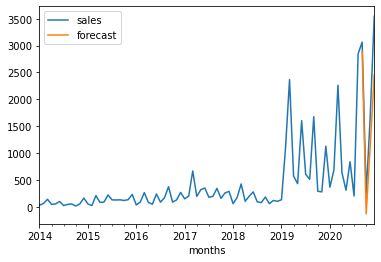

In [98]:
dd[['sales','forecast']].plot()

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   84
Model:             SARIMAX(8, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -619.957
Date:                            Wed, 17 Mar 2021   AIC                           1261.915
Time:                                    19:56:31   BIC                           1288.654
Sample:                                01-01-2014   HQIC                          1272.664
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7842      0.112      7.009      0.000       0.565       1.004
ar.L2         -0.6183      0.206     -2.997      0.003      -1.023      -0.214
ar.L3          0.8821      0.314      2.811      0.005       0.267       1.497
ar.L4         -0.3663      0.242     -1.510      0.131      -0.842       0.109
ar.L5          0.4289      0.372      1.154      0.248      -0.300       1.157
ar.L6         -0.0597      0.371     -0.161      0.872      -0.786       0.667
ar.L7         -0.2933      0.318     -0.922      0.356      -0.916       0.330
ar.L8          0.2068      0.373      0.554      0.579      -0.525       0.938
ar.S.L12       0.2600      0.247      1.055      0.292      -0.223       0.743
ar.S.L24       0.0871      0.282      0.309      0.757      -0.465       0.639
sigma2      1.425e+05   2.12e+04      6.715      0.000    1.01e+05    1.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               744.54
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):             146.28   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
output=results.forecast(24)

In [69]:
output

2021-01-01    1934.409721
2021-02-01    2078.260624
2021-03-01    2487.120223
2021-04-01    1318.468817
2021-05-01    2646.245428
2021-06-01    2647.456393
2021-07-01     735.755834
2021-08-01    2441.455565
2021-09-01    3167.019026
2021-10-01    1423.199505
2021-11-01    2219.038252
2021-12-01    2550.283276
2022-01-01    1533.114351
2022-02-01    2642.945951
2022-03-01    2617.630752
2022-04-01    1211.016532
2022-05-01    2313.026102
2022-06-01    2425.295499
2022-07-01    1324.563730
2022-08-01    2503.028505
2022-09-01    2403.784390
2022-10-01    1333.836329
2022-11-01    2417.287211
2022-12-01    2361.685238
Freq: MS, Name: predicted_mean, dtype: float64

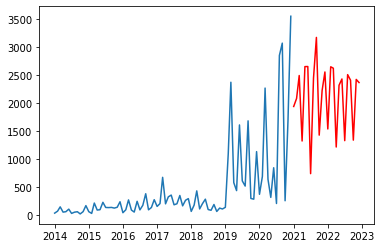

In [119]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [71]:
from pandas.tseries.offsets import DateOffset

In [72]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [73]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [74]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [75]:
future_dd=pd.concat([dd,future_dates_dd])

In [76]:
future_dd['forecast']=results.predict(start=82,end=107,dynamic=True)

<AxesSubplot:>

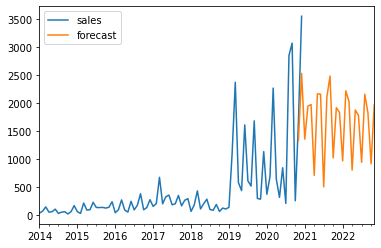

In [77]:
future_dd[['sales','forecast']].plot()

In [112]:
fr['sales'].mean()

2135.5

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
from math import sqrt

In [111]:
fr = dd[80:84]
fr

,sales,forecast
months,,
2020-09-01,3065,2898.385155
2020-10-01,252,-128.913403
2020-11-01,1680,1131.501633
2020-12-01,3545,2459.042845


In [116]:
rmse = np.sqrt((fr['forecast']-fr['sales'])**2).mean()

In [118]:
print(rmse/2135.5)

0.25544179000055806
